In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
df=pd.read_csv('uber.csv')

In [4]:
df.isna().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [5]:
df=df.dropna()

In [6]:
df.isna().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [7]:
df=df.drop(columns=['Unnamed: 0','key','pickup_datetime'])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 199999 entries, 0 to 199999
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        199999 non-null  float64
 1   pickup_longitude   199999 non-null  float64
 2   pickup_latitude    199999 non-null  float64
 3   dropoff_longitude  199999 non-null  float64
 4   dropoff_latitude   199999 non-null  float64
 5   passenger_count    199999 non-null  int64  
dtypes: float64(5), int64(1)
memory usage: 10.7 MB


In [9]:
(df.fare_amount==0).any()

True

In [10]:
df=df[df['fare_amount']!=0]

In [11]:
(df.fare_amount==0).any()

False

In [12]:
# Step 2: Feature Engineering - Calculate Distance
#Since we have latitude and longitude coordinates, we can calculate the Haversine distance between the pickup and drop-off points, which provides an approximate "as-the-crow-flies" distance in kilometers.

In [13]:
from math import radians,sin,cos,sqrt,atan2

In [14]:
#The Haversine distance is a formula used to calculate the shortest distance between two points on the Earth's surface, given their latitude and longitude.
def cal_distance(df):
    R=6371 # radius of earth
    x1=df['pickup_longitude']
    y1=df['pickup_latitude']
    x2=df['dropoff_longitude']
    y2=df['dropoff_latitude']
    # Convert latitude and longitude from degrees to radians
    lat1,lon1,lat2,lon2=map(radians,[x1,y1,x2,y2])
     # Calculate differences
    dlon=lon2-lon1
    dlat=lat2-lat1
    #apply  the Haversine formula 
    a=sin(dlat/2)**2+cos(lat1)*cos(lat2)*sin(dlon/2)**2
    c=2*atan2(sqrt(a),sqrt(1-a))
    return R*c
    

In [15]:
df['distance']=df.apply(cal_distance,axis=1)

In [16]:
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,0.465181
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,0.678728
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,4.823521
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,1.261639
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,5.369902


In [17]:
df['distance'].describe()

count    199994.000000
mean         20.454706
std         388.952461
min           0.000000
25%           0.824441
50%           1.526194
75%           2.807679
max       16321.330096
Name: distance, dtype: float64

In [18]:
(df.distance==0).any()

True

In [19]:
df=df[df['distance']!=0]

In [20]:
(df.distance==0).any()

False

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: ylabel='distance'>

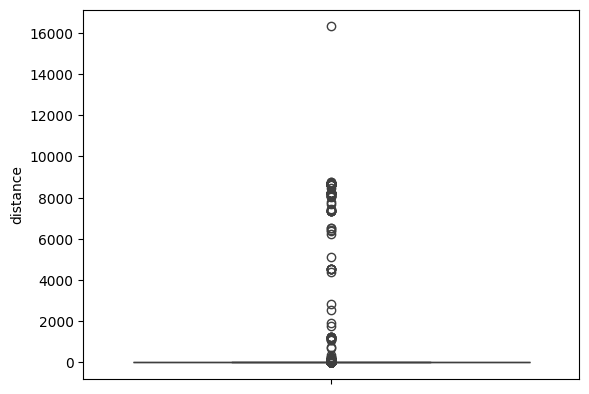

In [22]:
sns.boxplot(df['distance'])

In [23]:
df[df['distance']>10000]

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance
75851,15.7,-1340.64841,1644.421482,-3356.6663,872.697628,1,16321.330096


In [24]:
df=df[df['distance']<10000]

<Axes: ylabel='fare_amount'>

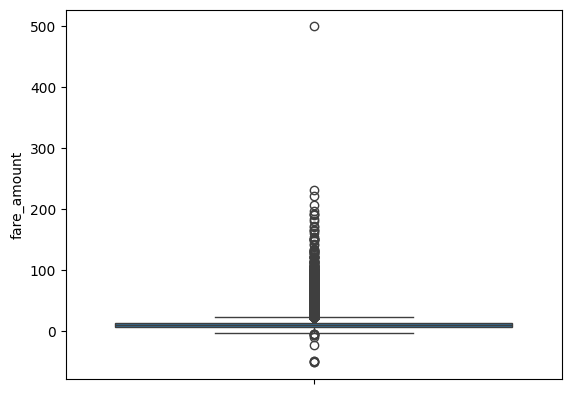

In [25]:
sns.boxplot(df['fare_amount'])

In [26]:
df[df['fare_amount']>300]

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance
170081,499.0,-73.968377,40.764602,-73.968368,40.7646,1,0.001003


In [27]:
df=df[df['fare_amount']<300]

<Axes: ylabel='passenger_count'>

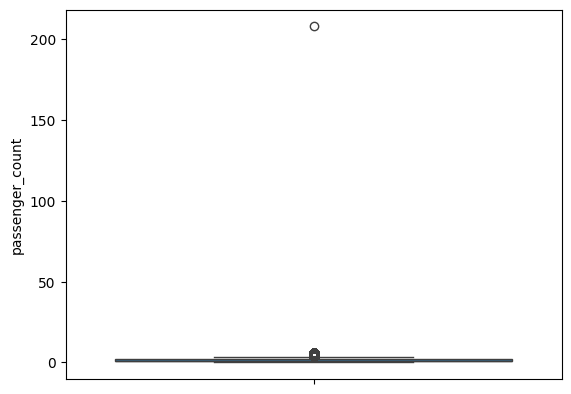

In [28]:
sns.boxplot(df['passenger_count'])

In [29]:
df[df['passenger_count']>50]

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance
113038,11.7,-73.937795,40.758498,-73.937835,40.758415,208,0.005129


In [30]:
df=df[df['passenger_count']<50]

<Axes: ylabel='passenger_count'>

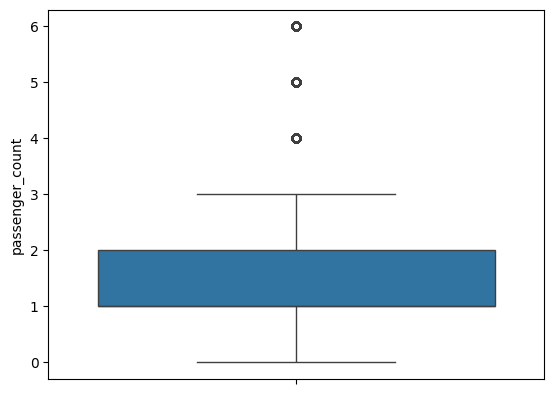

In [31]:
sns.boxplot(df['passenger_count'])

In [32]:
df[df['passenger_count']>5]

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance
145,38.54,-73.862762,40.768791,-73.978737,40.753040,6,12.904888
252,10.50,-73.981239,40.752876,-73.995277,40.726177,6,1.762725
390,4.50,-73.989575,40.758767,-73.969325,40.766030,6,2.262702
392,22.00,-73.978450,40.736707,-73.934902,40.810442,6,5.346243
416,5.00,-73.977120,40.745432,-73.974743,40.750415,6,0.305375
...,...,...,...,...,...,...,...
199796,9.00,-73.970375,40.761642,-73.980985,40.757700,6,1.185967
199876,11.30,-73.973325,40.748505,-74.004147,40.741472,6,3.434031
199890,7.00,-73.989767,40.725547,-74.002000,40.716875,6,1.385985
199893,6.00,-73.972245,40.749600,-73.984660,40.732842,6,1.473174


In [33]:
df.corr()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance
fare_amount,1.000000,0.011006,-0.008096,0.012803,-0.011461,0.012456,0.025319
pickup_longitude,0.011006,1.000000,-0.413573,0.329369,-0.396313,0.004468,0.291153
pickup_latitude,-0.008096,-0.413573,1.000000,0.045240,0.060247,-0.006406,-0.204677
dropoff_longitude,0.012803,0.329369,0.045240,1.000000,-0.876385,0.004946,0.323077
dropoff_latitude,-0.011461,-0.396313,0.060247,-0.876385,1.000000,-0.005632,-0.212307
passenger_count,0.012456,0.004468,-0.006406,0.004946,-0.005632,1.000000,-0.001841
distance,0.025319,0.291153,-0.204677,0.323077,-0.212307,-0.001841,1.000000


<Axes: >

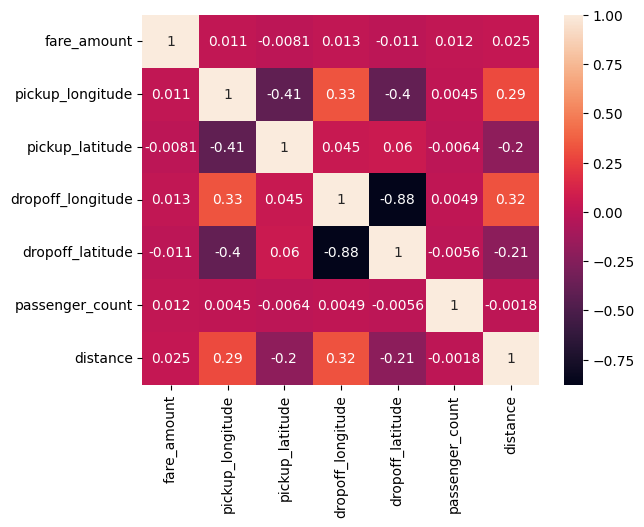

In [34]:
sns.heatmap(df.corr(),annot=True)

In [35]:
from sklearn.preprocessing import MinMaxScaler

In [36]:
sc=MinMaxScaler()

In [37]:
df['distance']=sc.fit_transform(df[['distance']])

In [38]:
df['passenger_count']=sc.fit_transform(df[['passenger_count']])

In [39]:
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance
0,7.5,-73.999817,40.738354,-73.999512,40.723217,0.166667,0.000053
1,7.7,-73.994355,40.728225,-73.994710,40.750325,0.166667,0.000077
2,12.9,-74.005043,40.740770,-73.962565,40.772647,0.166667,0.000549
3,5.3,-73.976124,40.790844,-73.965316,40.803349,0.500000,0.000144
4,16.0,-73.925023,40.744085,-73.973082,40.761247,0.833333,0.000611


In [40]:
x=df[['distance','passenger_count']]
y=df['fare_amount']

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [43]:
from sklearn.linear_model import LinearRegression

In [44]:
from sklearn.ensemble import RandomForestRegressor

In [45]:
linear_model=LinearRegression()

In [46]:
linear_model.fit(x_train,y_train)

LinearRegression()

In [47]:
pred=linear_model.predict(x_test)

In [48]:
from sklearn.metrics import r2_score,mean_squared_error

In [49]:
print('R2 score is : ',r2_score(y_test,pred))

R2 score is :  0.0008166387160682964


In [50]:
print('RMSE score is: ',np.sqrt(mean_squared_error(y_test,pred)))

RMSE score is:  9.666431739995115


In [51]:
rf=RandomForestRegressor(n_estimators=100, random_state=42)

In [52]:
rf.fit(x_train,y_train)

RandomForestRegressor(random_state=42)

In [53]:
pred=rf.predict(x_test)

In [54]:
r2_score(y_test,pred)

0.6461600338031012

In [55]:
np.sqrt(mean_squared_error(y_test,pred))

5.7523729346205785